## Decision Trees


A decision tree is a tree-like model that is commonly used in machine learning and data mining to make decisions. It is a type of supervised learning algorithm that can be used for both classification and regression problems. The algorithm works by recursively partitioning the data into subsets based on the values of the features.

Decision trees have several advantages, including their interpretability, ability to handle both categorical and numerical data, and their ability to capture non-linear relationships between the features and the target variable.


## AIM

To validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form

## Data

The data used was gotten from Kaggle.com (Ref: https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan/)
The dataset provided is a csv file that includes information on customers for whom loan eligibility is known as 'Loan_Status'. The company aims to automate the loan eligibility process in real-time, using customer details provided in online application forms such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To achieve this automation, the company has provided a dataset that can identify eligible customer segments for loan amounts, enabling targeted marketing efforts towards these specific customers.

## Libraries used

In [15]:
import numpy as np
import pandas as pd 
import pydot 
from sklearn import tree
from IPython.display import Image
from six import StringIO

In [16]:
# The read_csv() function is used to retrirve data from csv file 
df2 = pd.read_csv('Loan_Data.csv')

## Content

Description  Variable  
Loan_ID	Unique-- Loan ID  
Gender--	Male/ Female  
Married-- Applicant married (Y/N)  
Dependents-- 	Number of dependents  
Education-- 	Applicant Education (Graduate/ Under Graduate)  
Self_Employed-- 	Self employed (Y/N)  
ApplicantIncome-- 	Applicant income  
CoapplicantIncome-- 	Coapplicant income  
LoanAmount-- 	Loan amount in thousands  
Loan_Amount_Term-- 	Term of loan in months  
Credit_History-- 	credit history meets guidelines  
Property_Area-- 	Urban/ Semi Urban/ Rural  
Loan_Status	(Target)--  Loan approved (Y/N)  

In [17]:
#Checking for null values
df2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#backfilling null values 
df = df2.fillna(method='bfill')

In [20]:
#data Cleansing 
df['Dependents'] = df['Dependents'].str.replace ("+","")

/var/folders/fd/rn31mr3n6sn_11j61r1m4tcm0000gn/T/ipykernel_17140/2034104668.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace ("+","")


In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
#Checking approved and not approved loan 
df.groupby(['Loan_Status']).count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,192,192,192,192,192,192,192,192,192,192,192,192
Y,422,422,422,422,422,422,422,422,422,422,422,422


In [24]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
#Describing statistical information value of the dataset like max, min, sd, mean etc.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.416938,342.410423,0.84202
std,6109.041673,2926.248369,84.917398,64.428629,0.36502
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


### Mapping 

In [26]:
#Converting to numerical values for computation process. 
d = {'Y': 1, 'N': 0}
df['Loan_Status'] = df['Loan_Status'].map(d)

d = {'Urban': 1, 'Semiurban': 2, 'Rural': 3}
df['Property_Area'] = df['Property_Area'].map(d)

d = {'Yes': 1, 'No': 2}
df['Self_Employed'] = df['Self_Employed'].map(d)

d = {'Graduate': 1, 'Not Graduate': 2}
df['Education'] = df['Education'].map(d)

d = {'Yes': 1, 'No': 2}
df['Married'] = df['Married'].map(d)

d = {'Male': 1, 'Female': 2}
df['Gender'] = df['Gender'].map(d)


In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1,1,3,1,2,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,1,1


In [28]:
#Selecting x and y for input variables (droping the other colunms for this case)
df.drop(['Loan_ID', 'Gender', 'Married', 'Education'], axis = 1, inplace=True)

In [29]:
df

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,2,5849,0.0,128.0,360.0,1.0,1,1
1,1,2,4583,1508.0,128.0,360.0,1.0,3,0
2,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,0,2,2583,2358.0,120.0,360.0,1.0,1,1
4,0,2,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...
609,0,2,2900,0.0,71.0,360.0,1.0,3,1
610,3,2,4106,0.0,40.0,180.0,1.0,3,1
611,1,2,8072,240.0,253.0,360.0,1.0,1,1
612,2,2,7583,0.0,187.0,360.0,1.0,1,1


### Extracting Feature names

In [30]:
features =list(df.columns[:8])
features

['Dependents',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [31]:
y = df['Loan_Status']
x = df[features]

In [32]:
x

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,2,5849,0.0,128.0,360.0,1.0,1
1,1,2,4583,1508.0,128.0,360.0,1.0,3
2,0,1,3000,0.0,66.0,360.0,1.0,1
3,0,2,2583,2358.0,120.0,360.0,1.0,1
4,0,2,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...
609,0,2,2900,0.0,71.0,360.0,1.0,3
610,3,2,4106,0.0,40.0,180.0,1.0,3
611,1,2,8072,240.0,253.0,360.0,1.0,1
612,2,2,7583,0.0,187.0,360.0,1.0,1


## Creating the Model

In [33]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y) #traning

## Displaying the decision tree model currently made

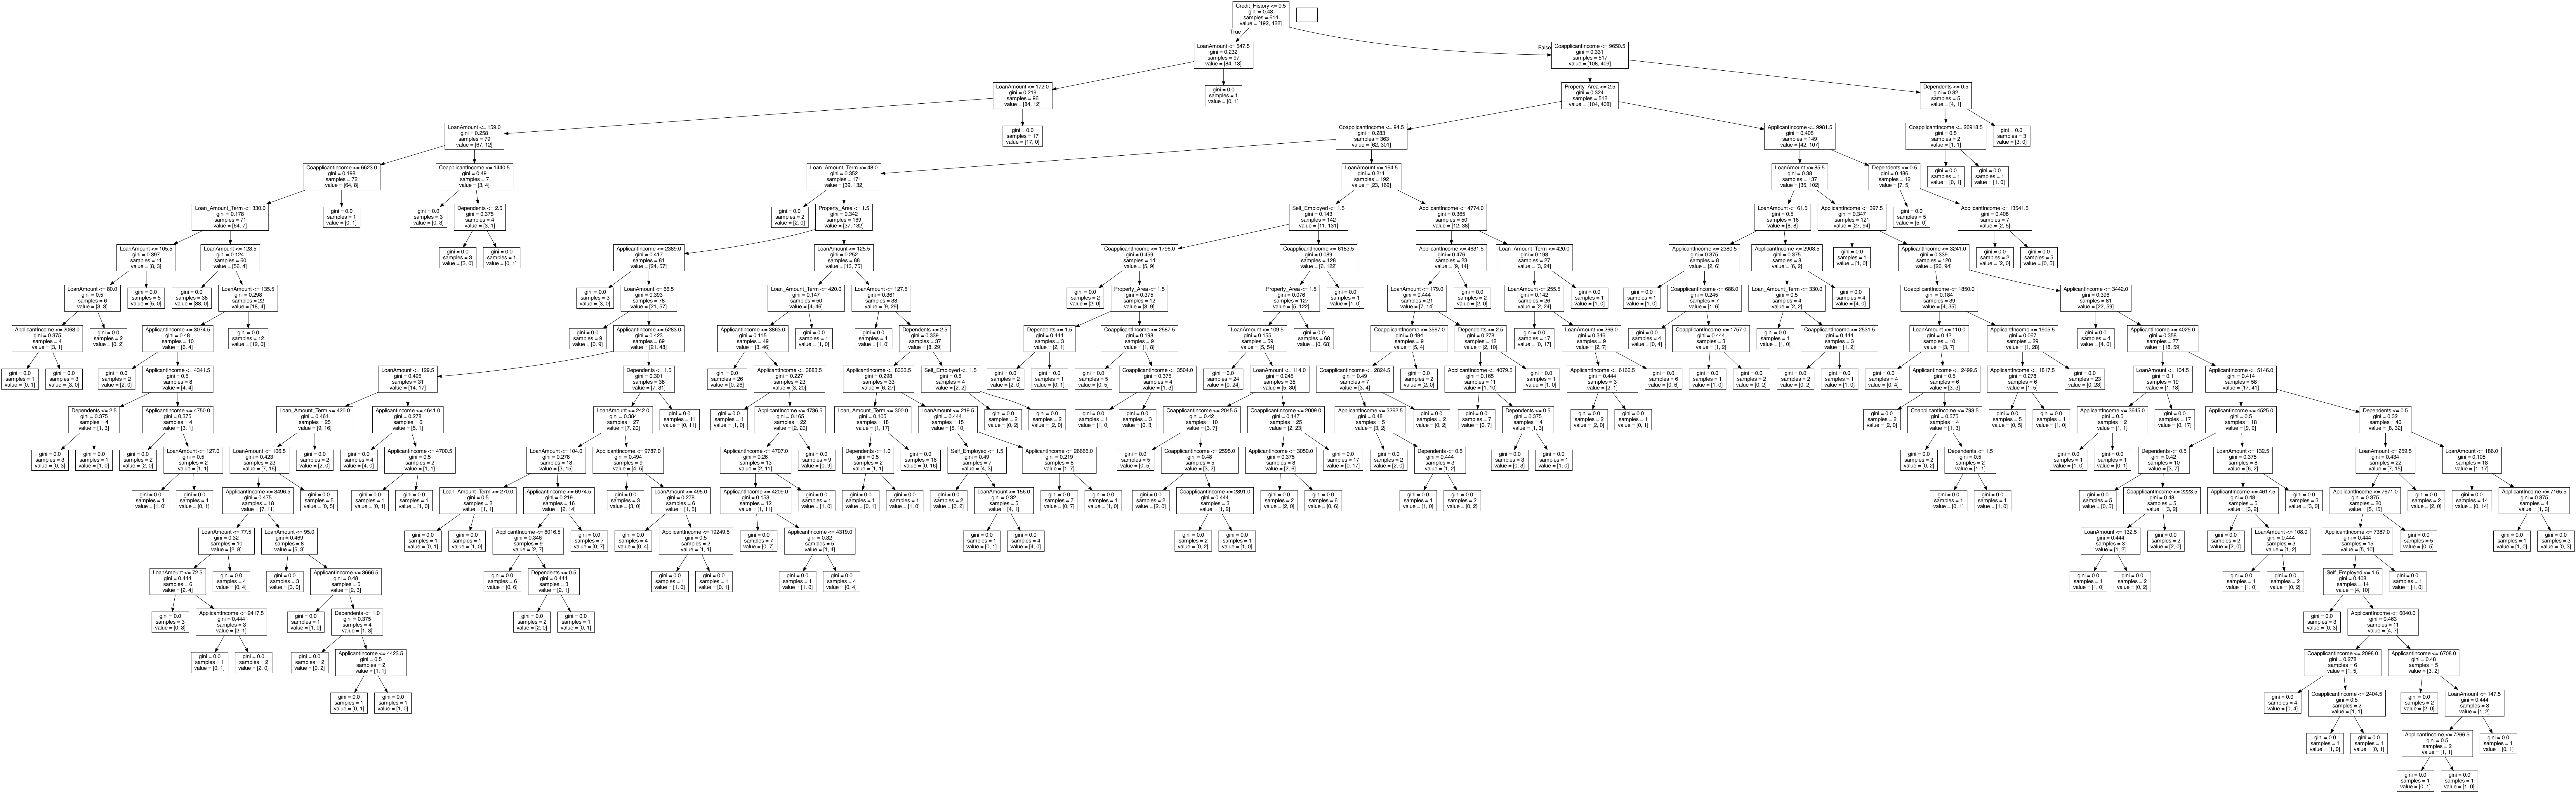

In [34]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

### Observation

If the applicant's income is less than 50% while the co-applicant's income is greater than 75%, the loan application will be evaluated based on the next set of criteria. Therefore, having a co-applicant can be advantageous when the primary applicant's income is low.

## Predictions

The use case here is to check the loan that will be approved based on the following  criteria:
1. Dependents : 0,	Self_Employed : Yes, ApplicantIncome : 3500.00,	CoapplicantIncome : 3000.00, LoanAmount : 128.00, Loan_Amount_Term : 360.00, Credit_History : 0.5,	Property_Area : Urban
2. Dependents : 0,	Self_Employed : Yes, ApplicantIncome : 3500.00,	CoapplicantIncome : 3000.00, LoanAmount : 166.00, Loan_Amount_Term : 360.00, Credit_History : 0.5,	Property_Area : Urban 
3. Dependents : 2,	Self_Employed : Yes, ApplicantIncome : 3500.00,	CoapplicantIncome : 2000.00, LoanAmount : 128.00, Loan_Amount_Term : 150.00, Credit_History : 0.5,	Property_Area : Urban
4. 

In [75]:
# Predicting loan approval  
print (clf.predict([[0, 1, 3500.00, 3000.00, 128.00, 360.00, 0.5, 1]]))
print (clf.predict([[0, 1, 3500.00, 3000.00, 166.00, 360.00, 0.5, 2]]))
print (clf.predict([[2, 2, 3500.00, 2000.00, 128.00, 150.00, 0.5, 3]]))
print (clf.predict([[2, 1, 7000.00, 3500.00, 400.00, 12.00, 1, 1]]))

[1]
[0]
[0]
[1]


/Users/ehi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/ehi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/ehi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/ehi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
df_data = {'Dependents' : [0, 1, 2], 'Self_Employed' : [1, 2, 3],	'ApplicantIncome' : [2800, 3500, 7000], 'CoapplicantIncome' : [2000, 3000, 3500], 'LoanAmount' : [128.00, 166.00, 400.00], 'Loan_Amount_Term' : [12.00, 150.00, 360.00], 'Credit_History' : [0.5, 1, 2], 'Property_Area' : [1, 2, 3] }

In [61]:
df_pred = pd.DataFrame(df_data)

In [62]:
df_pred

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,2800,2000,128.0,12.0,0.5,1
1,1,2,3500,3000,166.0,150.0,1.0,2
2,2,3,7000,3500,400.0,360.0,2.0,3


## Conclusion 

If you have a high income, good credit, and a dependent with a good income, your loan application will be automatically approved with a low Loan_Amount_Term.